# Laborator 3. Regresia Liniara in Python utilizand Pandas si Scikit-Learn


## Cuprins

1. Selectarea setului de date si .
2. Importarea bibliotecilor si setului de date.
3. Studierea setului de date.
4. Setarea problemei si Pregatirea setului de date pentru antrenare.<br>
   a. Divizare in set de date pentru antrenare si set de date pentru testare. <br>
   b. Utilizarea k-folds cross validation pentru testare.
5. Initializarea modelului de regresie liniara si aplicarea acestuia pe datele noastre.
6. Concluzii.

## Importarea bibliotecilor si setului de date

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

incarcam fisierul .csv intr-un dataframe |
daca la voi nu e csv, incercati mai intai sa-l transformati in csv


In [5]:
data = pd.read_csv('Advertising.csv')
data


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Studierea setului de date prin manipularea acestuia

Hai sa vizualizam datele, grafic

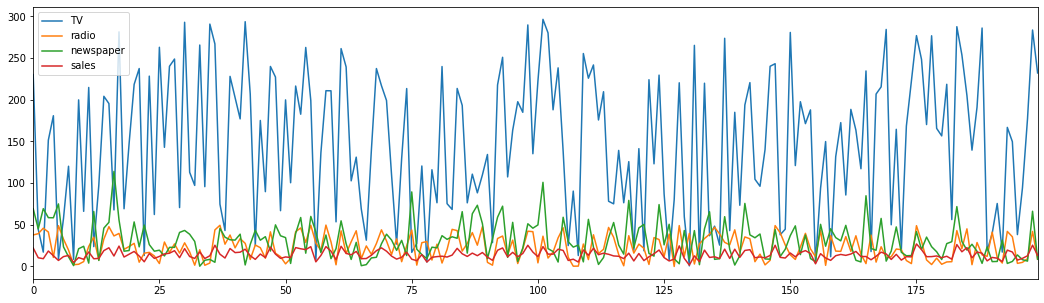

In [6]:
data.plot(figsize=(18,5)) # figsize este marimea dreptunghiului unde este afisat graficul (latimea si lungimea)

## Anomalii in anumite coloane (Muntii din grafic)

Anomaliile din date sunt niste valori extreme ale unor caracteristici. <br>
Valorile extreme, de obicei, apar in rezulatatul unui experiment eronat, sau chiar poate fi o valoare corecta.
Cel mai bine este sa le stergem.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13364530>,
      dtype=object)

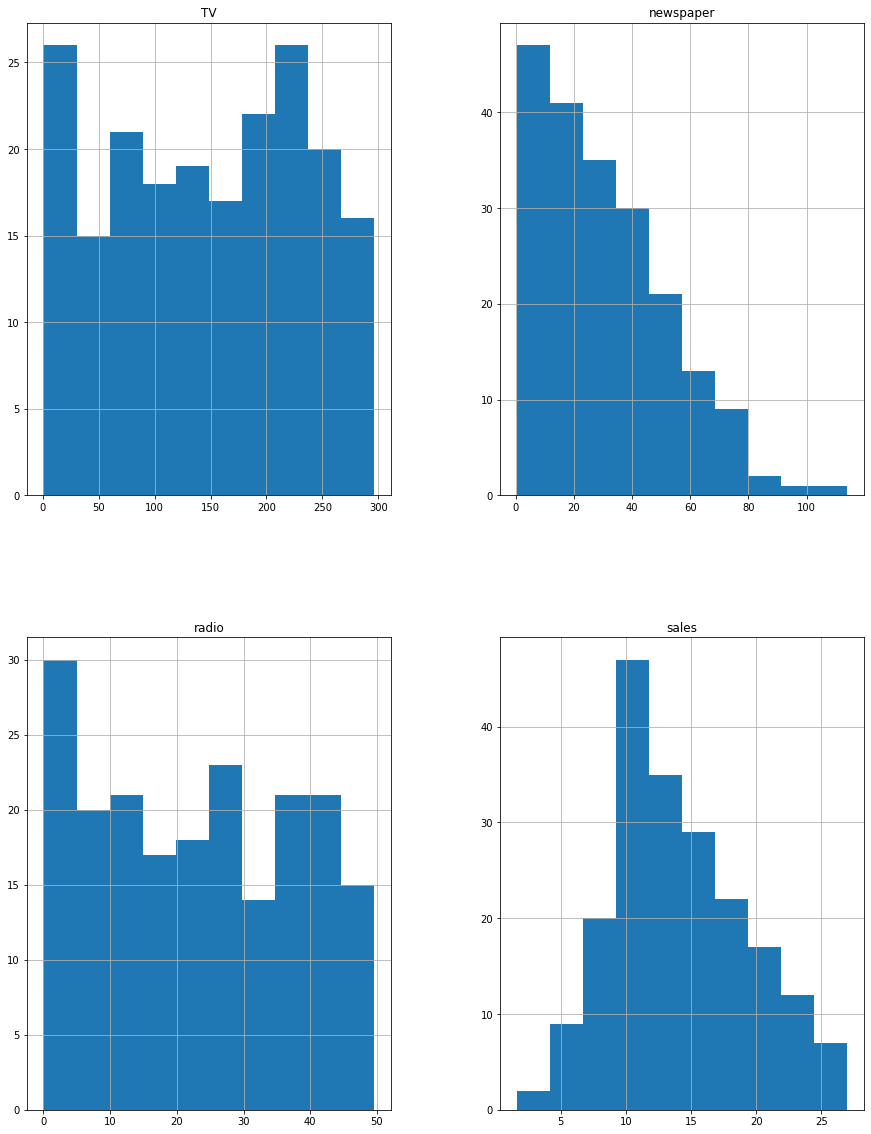

In [7]:
data.hist(figsize = (15,20))

## Definirea problemei de regresie


Prezicem Vanzarile in raport cu banii cheltuiti pentru publicitate la TV

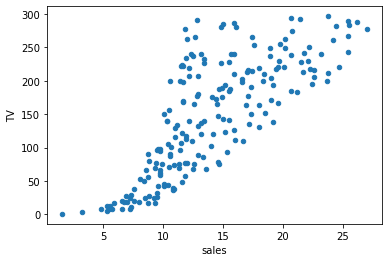

In [8]:
XY=data[['TV','sales']]
XY.plot.scatter(y = 'TV', x = 'sales')

In [9]:
XY.corr()
# XY.descibe()

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


In [52]:
model = LinearRegression()

In [53]:
#X = data.as_matrix(['TV'])
X = data[['TV', 'radio', 'newspaper']]
Y = data.as_matrix(['sales'])

c:\users\dp\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
model = model.fit(X,Y)
model.predict([[200, 20, 15]])
#model.predict(np.array([[200]])

array([[15.8468564]])

Calculam r patart

In [65]:
scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=40)
for i, (train, test) in enumerate(kfold.split(X, Y)):
     scores.append(model.score(X, Y))
print(scores)

[0.8972106381789521, 0.8972106381789521, 0.8972106381789521, 0.8972106381789521, 0.8972106381789521]


In [66]:
x = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

predictions = LinearRegression()
predictions.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
predictions = predictions.predict(x)

plt.figure(figsize=(8, 8))
plt.scatter(data['TV'],data['sales'],c='black'
)
plt.plot(data['TV'],predictions,c='blue',linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In acest laborator am studiat analiza de regresie, aceasta este un instrument de modelare statistică, folosit pentru a determina un model al legăturilor care se stabilesc între perechi de date numerice.
r patrat indică cât de bine sunt ajustate datele cu modelul, din rezultatele obtinute observam ca modelul are date corecte.